<a href="https://colab.research.google.com/github/tajuar-akash-hub/test_repo_for_colaboration/blob/main/data_vizualization_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 477.69 KiB | 8.10 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
insurance_fraud=pd.read_csv('/content/Datasets/Health Insurance Fraud Claims csv file.csv')

insurance_fraud.head(1)

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,4d76c7f7-d36a-4139-b451-a9a4ad10d7d5,19cf2638-3ec0-4ed9-9995-d9ba4553813a,a3d0cc80-dffe-40ff-a302-23c8ffeedb36,7820.52,2024-07-08 00:00:00,Ta150,iO013,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate


In [5]:
insurance_fraud.describe()

,ClaimAmount,PatientAge,PatientIncome,Cluster
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,5014.203867,49.838444,84384.284084,1.503111
std,2866.291066,28.790471,37085.908878,1.127261
min,100.120000,0.000000,20006.870000,0.000000
25%,2509.072500,25.000000,52791.905000,0.000000
50%,5053.765000,50.500000,84061.205000,2.000000
75%,7462.452500,75.000000,115768.417500,3.000000
max,9997.200000,99.000000,149957.520000,3.000000


# Age under 18

In [6]:
age_under_18=insurance_fraud[insurance_fraud['PatientAge']< 18]
len(age_under_18)

801

In [7]:
insurance_fraud = insurance_fraud.drop(age_under_18.index)
insurance_fraud.shape

(3699, 19)

#remove unwanted columns from the datasets

In [8]:
insurance_fraud = insurance_fraud[["ClaimDate","ClaimAmount","PatientAge","PatientGender","ProviderSpecialty","ClaimStatus","PatientIncome","PatientMaritalStatus","PatientEmploymentStatus","ProviderLocation","ClaimType","ClaimSubmissionMethod","ClaimLegitimacy"]]

print(f"Shape of the datasets: {insurance_fraud.shape}")

insurance_fraud.head(1)

Shape of the datasets: (3699, 13)


,ClaimDate,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimLegitimacy
0,2024-07-08 00:00:00,7820.52,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,Legitimate


# all coulmns unique values

In [9]:
all_unique = insurance_fraud.nunique()

all_unique_df = pd.DataFrame(all_unique, columns=['Unique Value Count'])

all_unique_df

,Unique Value Count
ClaimDate,725
ClaimAmount,3690
PatientAge,82
PatientGender,2
ProviderSpecialty,5
ClaimStatus,3
PatientIncome,3699
PatientMaritalStatus,4
PatientEmploymentStatus,4
ProviderLocation,3241


# Check duplicated values

In [10]:
duplicates=insurance_fraud.duplicated()
flag=0
for duplicate in duplicates:
  if duplicate == True:
    flag=1
    print(f"duplicate values {duplicate}")
if flag == 0:
  print("No duplicates row")


No duplicates row


# Check Outliers with  IQR outliers data

In [11]:
iqr_outlier_data = insurance_fraud.copy()


In [12]:
def iqr_outliers(data,x):
  Q1=np.percentile(data[x],25)
  Q3=np.percentile(data[x],75)
  IQR=Q3-Q1
  lower_bound=Q1 - (1.5 * IQR)
  upper_bound=Q1 + (1.5 * IQR)
  outliers=[]
  outliers_index=[]
  for i,value in data[x].items():
    if value< lower_bound or value > upper_bound:
      outliers.append(value)
      outliers_index.append(i)
  return outliers,outliers_index

In [13]:
## outliers in PatientIncome
income,outliers_index=iqr_outliers(iqr_outlier_data,"PatientIncome")


print(f"outliers in PatientIncome : {len(income)}")

print(f"outliers Indexes in PatientIncome : {outliers_index}")

outliers in PatientIncome : 42
outliers Indexes in PatientIncome : [111, 202, 211, 569, 646, 661, 702, 729, 760, 861, 1121, 1217, 1387, 1524, 1549, 1553, 1620, 1689, 1744, 1811, 1885, 2087, 2213, 2400, 2683, 2722, 2892, 2954, 3210, 3350, 3386, 3528, 3552, 3594, 3668, 3699, 4001, 4050, 4253, 4272, 4303, 4460]


In [14]:
outliers_remove_data = iqr_outlier_data.copy()

outliers_replace_data = iqr_outlier_data.copy()

iqr_outlier_data.shape,outliers_remove_data.shape,outliers_replace_data.shape

((3699, 13), (3699, 13), (3699, 13))

In [15]:
outliers_remove_data = outliers_remove_data.drop(index=outliers_index)

print(f"After removing outliers from 'PatientIncome': {outliers_remove_data.shape}")

After removing outliers from 'PatientIncome': (3657, 13)


## Replace  PatientAge and patient income columns with mean_age

In [ ]:


# 1. Detect and replace outliers in 'PatientAge and patient income '

_,outliers_index=iqr_outliers(outliers_replace_data,"PatientIncome")

mean_income = np.mean(outliers_replace_data['PatientAge'])

mean_age=int(mean_income)


# Replace the outliers with the mean in 'PatientAge'
for index in outliers_index:
    outliers_replace_data.loc[index, 'PatientAge'] = mean_age

In [20]:
#this cell added by Akash

#replace outlier

outliers_replaced_data = iqr_outlier_data.copy()


# 1. Detect outliers in 'PatientIncome'

outliers, outliers_index = iqr_outliers(outliers_replaced_data, "PatientIncome")

# 2. Calculate the mean of 'PatientIncome'
mean_income = np.mean(outliers_replaced_data['PatientIncome'])


# 3. Replace the outliers with the mean in 'PatientIncome'

for index in outliers_index:
    outliers_replaced_data.loc[index, 'PatientIncome'] = mean_income

In [21]:
outliers_replace_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3699 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimDate                3699 non-null   object 
 1   ClaimAmount              3699 non-null   float64
 2   PatientAge               3699 non-null   int64  
 3   PatientGender            3699 non-null   object 
 4   ProviderSpecialty        3699 non-null   object 
 5   ClaimStatus              3699 non-null   object 
 6   PatientIncome            3699 non-null   float64
 7   PatientMaritalStatus     3699 non-null   object 
 8   PatientEmploymentStatus  3699 non-null   object 
 9   ProviderLocation         3699 non-null   object 
 10  ClaimType                3699 non-null   object 
 11  ClaimSubmissionMethod    3699 non-null   object 
 12  ClaimLegitimacy          3699 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 533.6+ KB


In [ ]:
outliers_remove_data.info()

# Check ClaimLegitimacy distributions

In [23]:
value_counts = outliers_replace_data.groupby('ClaimLegitimacy').size().reset_index(name = 'Count')

value_counts

,ClaimLegitimacy,Count
0,Fraud,226
1,Legitimate,3473


# EDA


## 1. Univariate Analysis

## Histogram

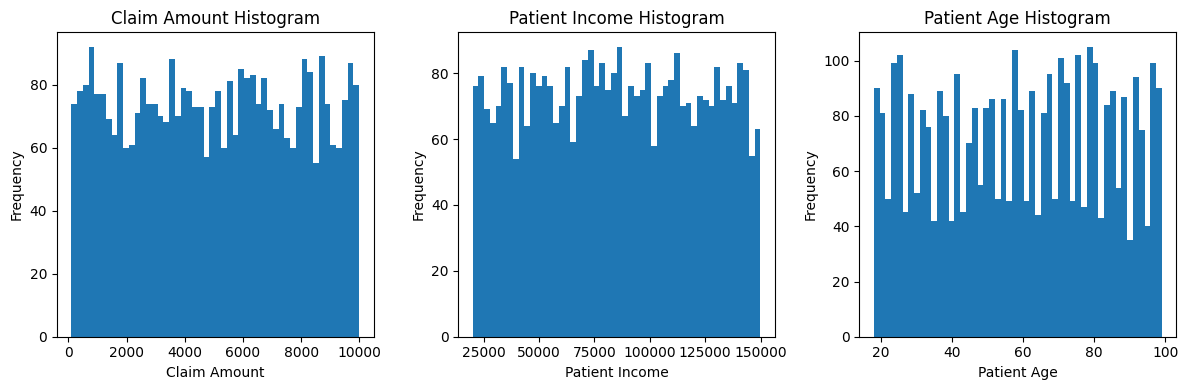

In [ ]:
#  make histograms for  `ClaimAmount`, `PatientIncome`, and `PatientAge`.

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(insurance_fraud['ClaimAmount'], bins=50)
plt.title('Claim Amount Histogram')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(insurance_fraud['PatientIncome'], bins=50)
plt.title('Patient Income Histogram')
plt.xlabel('Patient Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(insurance_fraud['PatientAge'], bins=50)
plt.title('Patient Age Histogram')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

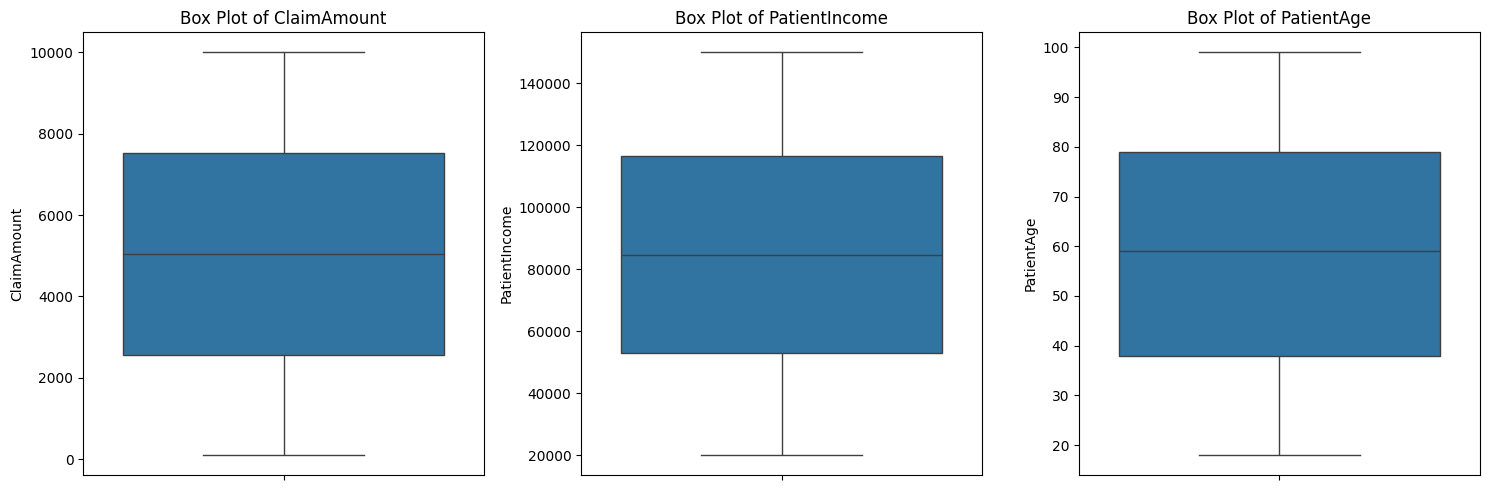

In [ ]:
# make box plots for continuous variables

# Assuming 'insurance_fraud' is your DataFrame

# Create box plots for continuous variables
continuous_vars = ['ClaimAmount', 'PatientIncome', 'PatientAge']

plt.figure(figsize=(15, 5))

for i, var in enumerate(continuous_vars):
  plt.subplot(1, 3, i+1)
  sns.boxplot(y=insurance_fraud[var])
  plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

<ipython-input-19-d7b668c26884>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_fraud[var], palette='viridis');  # Use 'viridis' color palette
<ipython-input-19-d7b668c26884>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_fraud[var], palette='viridis');  # Use 'viridis' color palette
<ipython-input-19-d7b668c26884>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_fraud[var], palette='viridis');  # Use 'viridis' color palette
<ipython-input-19-d7b668c26884>:13: FutureWarning: 

Passing `palette`

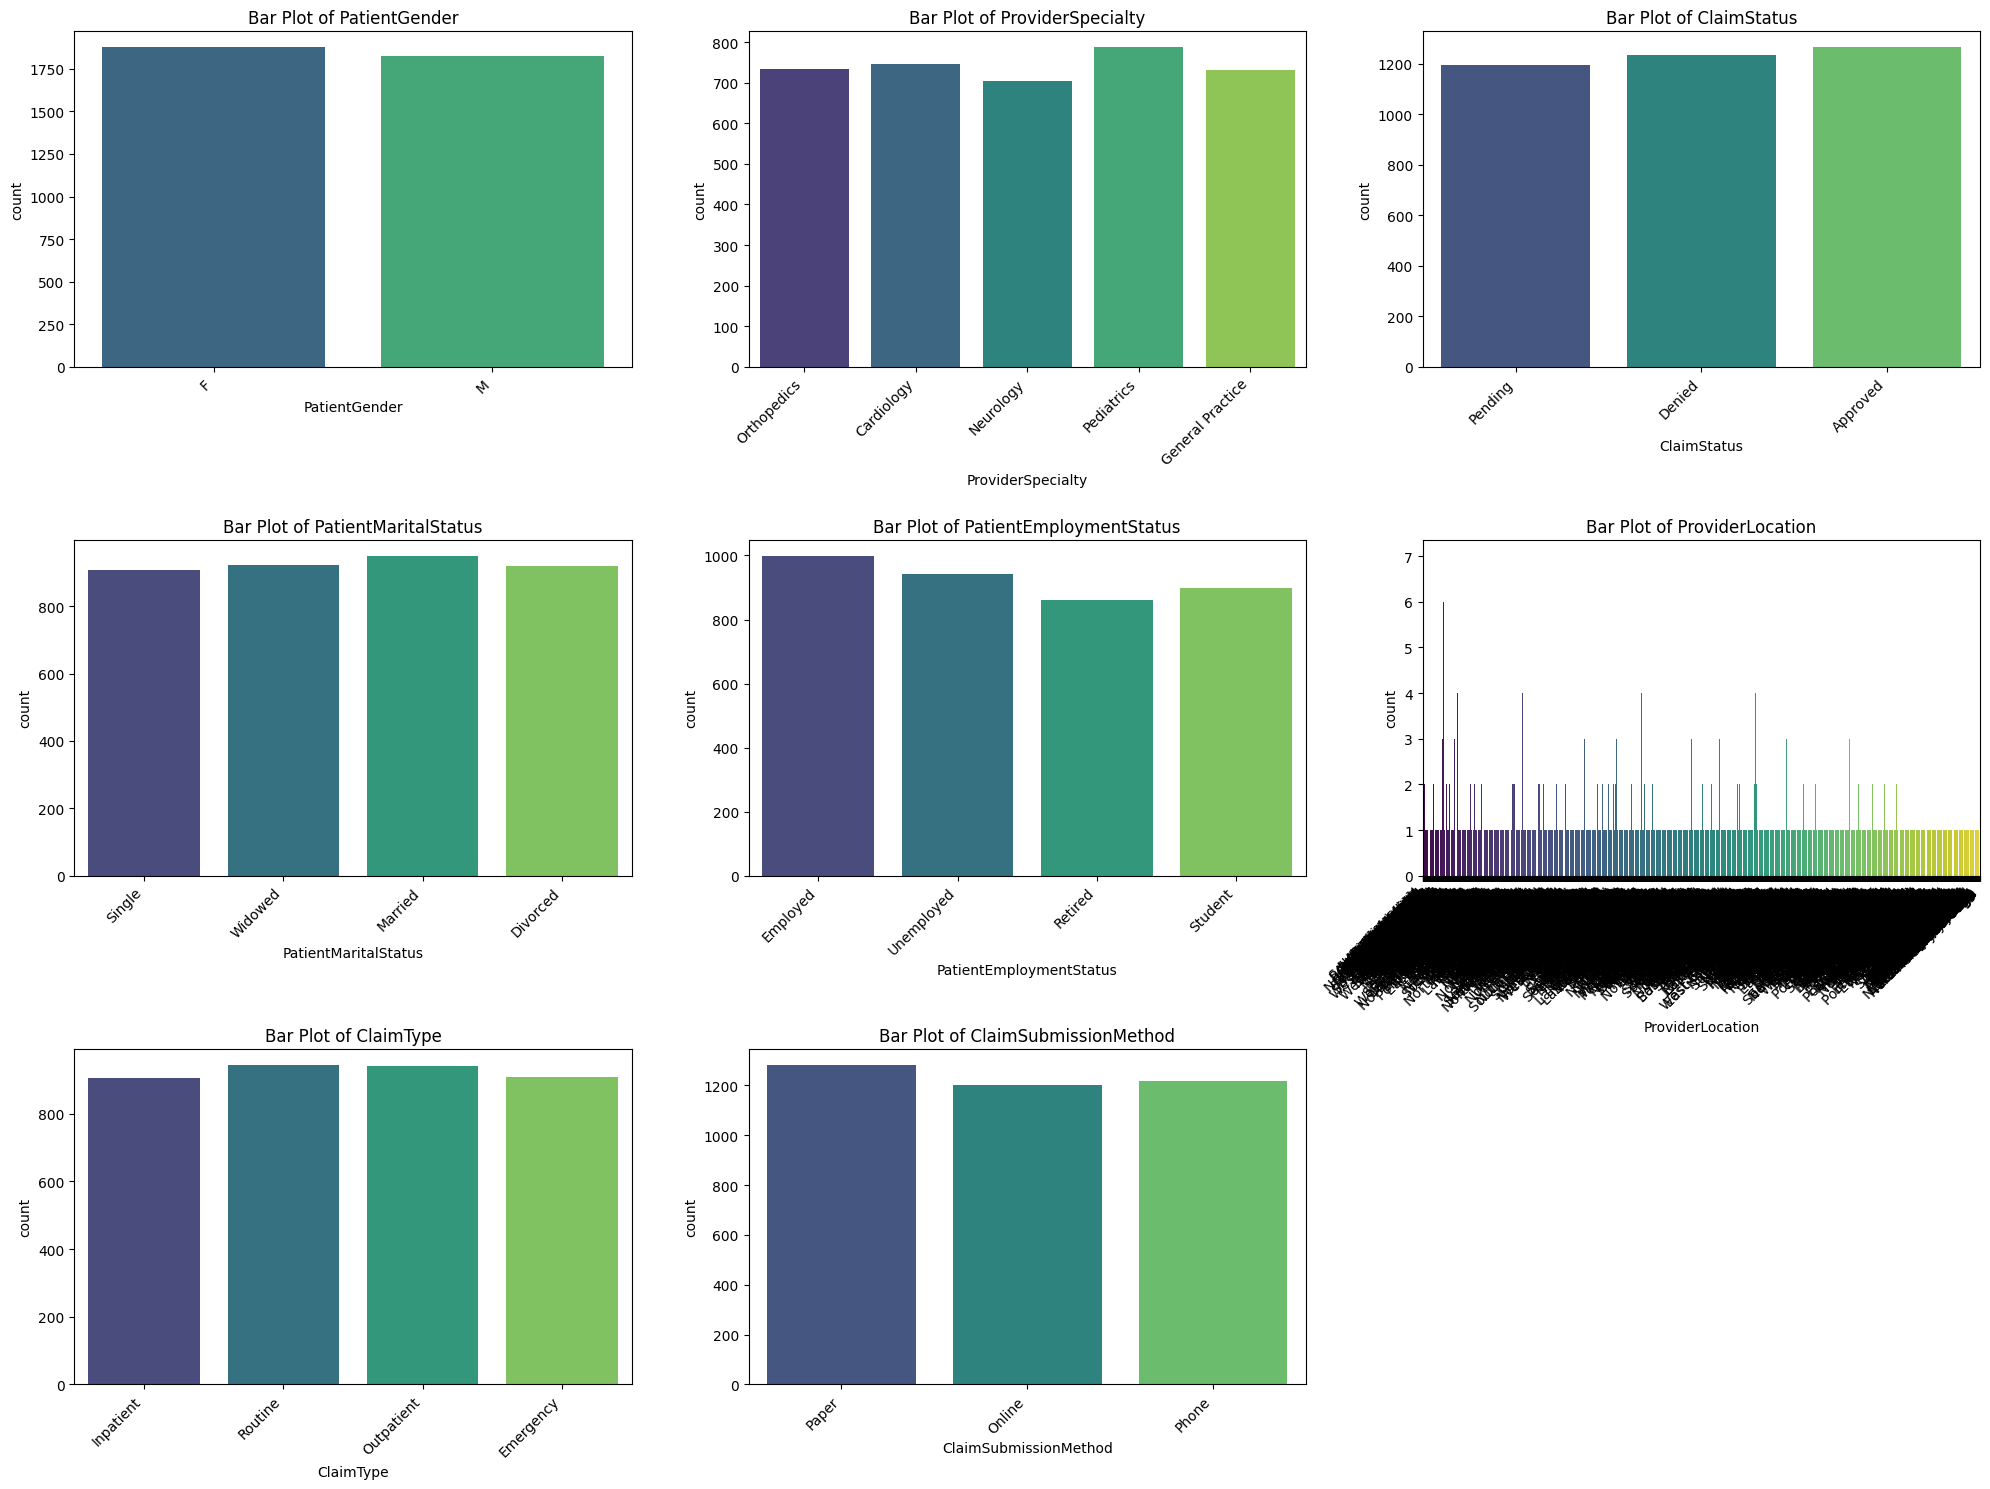

In [ ]:
# prompt: make barplots For categorical variables and use color palates

# Assuming 'insurance_fraud' is your DataFrame

# Create bar plots for categorical variables with custom color palettes
categorical_vars = ['PatientGender', 'ProviderSpecialty', 'ClaimStatus', 'PatientMaritalStatus',
                    'PatientEmploymentStatus', 'ProviderLocation', 'ClaimType', 'ClaimSubmissionMethod']

plt.figure(figsize=(20, 15));

for i, var in enumerate(categorical_vars):
  plt.subplot(3, 3, i+1);
  sns.countplot(x=insurance_fraud[var], palette='viridis');  # Use 'viridis' color palette
  plt.title(f'Bar Plot of {var}');
  plt.xticks(rotation=45, ha='right');  # Rotate x-axis labels for better readability

plt.tight_layout();
plt.show();

*need to remove unnecessary lines of code before graph*

# Statistical

In [ ]:
#  Mean, median, mode, variance, standard deviation, etc., for PatientIncome, PatientAge ,ClaimAmount

# Calculate mean, median, mode, variance, and standard deviation for PatientIncome, PatientAge, ClaimAmount

for column in ['PatientIncome', 'PatientAge', 'ClaimAmount']:
  print(f"\nStatistics for {column}:")
  print(f"Mean: {insurance_fraud[column].mean()}")
  print(f"Median: {insurance_fraud[column].median()}")
  try:
    print(f"Mode: {insurance_fraud[column].mode()[0]}")  # Mode can have multiple values, so we take the first one
  except:
    print("Mode: No unique mode found")
  print(f"Variance: {insurance_fraud[column].var()}")
  print(f"Standard Deviation: {insurance_fraud[column].std()}")


Statistics for PatientIncome:
Mean: 84792.77053527978
Median: 84459.2
Mode: 20006.87
Variance: 1379364830.1339095
Standard Deviation: 37139.80115905185

Statistics for PatientAge:
Mean: 58.72749391727494
Median: 59.0
Mode: 57
Variance: 558.1804526415949
Standard Deviation: 23.625842898013076

Statistics for ClaimAmount:
Mean: 5029.515971884293
Median: 5049.59
Mode: 862.1
Variance: 8274211.596859804
Standard Deviation: 2876.492933566812


In [ ]:
# Frequency Counts**: For categorical variables

# Frequency counts for categorical variables
for column in ['PatientGender', 'ProviderSpecialty', 'ClaimStatus', 'PatientMaritalStatus',
                'PatientEmploymentStatus', 'ProviderLocation', 'ClaimType', 'ClaimSubmissionMethod', 'ClaimLegitimacy']:
  print(f"\nFrequency counts for {column}:")
  print(insurance_fraud[column].value_counts())


Frequency counts for PatientGender:
PatientGender
F    1876
M    1823
Name: count, dtype: int64

Frequency counts for ProviderSpecialty:
ProviderSpecialty
Pediatrics          787
Cardiology          746
Orthopedics         733
General Practice    730
Neurology           703
Name: count, dtype: int64

Frequency counts for ClaimStatus:
ClaimStatus
Approved    1266
Denied      1237
Pending     1196
Name: count, dtype: int64

Frequency counts for PatientMaritalStatus:
PatientMaritalStatus
Married     949
Widowed     922
Divorced    919
Single      909
Name: count, dtype: int64

Frequency counts for PatientEmploymentStatus:
PatientEmploymentStatus
Employed      998
Unemployed    941
Student       899
Retired       861
Name: count, dtype: int64

Frequency counts for ProviderLocation:
ProviderLocation
North Michael          7
Port Jennifer          6
South Michael          6
Port Lisa              5
Port Michael           5
                      ..
Port Pamela            1
Sarahberg         

# 4. Time-Series Analysis


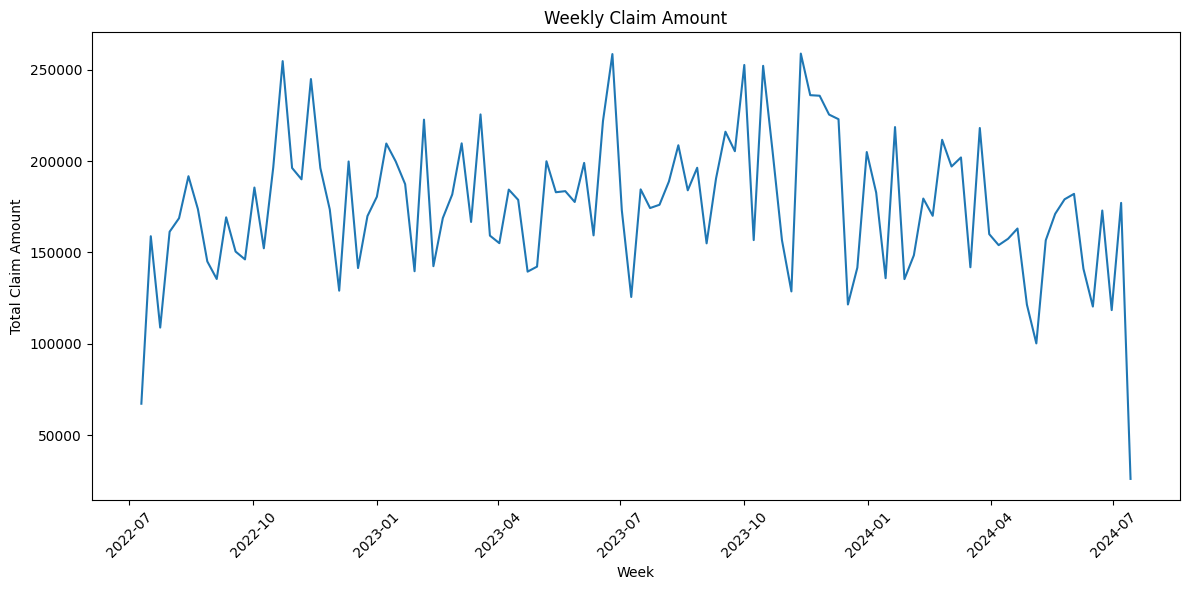

In [ ]:
# prompt: line plot on claimdate weekly show each week on x axis

# Convert 'ClaimDate' to datetime objects
insurance_fraud['ClaimDate'] = pd.to_datetime(insurance_fraud['ClaimDate'])

# Group by week and sum the claim amount
weekly_claims = insurance_fraud.groupby(pd.Grouper(key='ClaimDate', freq='W'))['ClaimAmount'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_claims.index, weekly_claims.values)
plt.xlabel('Week')
plt.ylabel('Total Claim Amount')
plt.title('Weekly Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# @title Import Librareis
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>EDA By Yousuf</strong>
</p>
"""

display(HTML(html_code))

In [ ]:
# @title Topics
from IPython.core.display import display, HTML

html_code = """
<a id='1'></a>
<p style="font-size: 35px; color: #2980b9; font-family: 'Comic Sans MS'; text-align: center; background-color: #f4d03f; border-radius: 5px 5px;">
    <strong> Topic Lists </strong>
</p>

<p style="font-size: 25px; color: #2980b9; font-family: 'Comic Sans MS'; text-align: left; background-color: #f9e79f; border-radius: 5px; padding: 10px;">
    <a href='#1' style="text-decoration: none; color: #2980b9;">1.  **Bivariate Analysis** </a>

</p>

<p style="font-size: 25px; color: #2980b9; font-family: 'Comic Sans MS'; text-align: left; background-color: #f9e79f; border-radius: 5px; padding: 10px;">
    <a href='#2' style="text-decoration: none; color: #2980b9;">2.  **Outlier Detection** </a>
</p>


"""

display(HTML(html_code))


# Scatter Plots**: To visualize relationships between two continuous variables such as `ClaimAmount` vs. `PatientIncome`, or `PatientAge` vs. `ClaimAmount`

In [ ]:
import plotly.express as px

fig = px.scatter(insurance_fraud, x="PatientAge", y="ClaimAmount")
fig.show()

# EDA By Akash <br>


3. **Multivariate Analysis**
   - This is the exploration of relationships between three or more variables.

   **Visualizations**:
   - **Pair Plots**: Visualize relationships between several numerical features at once using scatter plots and histograms.
   - **3D Scatter Plots**: To visualize relationships among three variables, especially useful when analyzing interactions between numeric variables.
   - **Facet Grid Plots**: To visualize multiple relationships (e.g., `ClaimAmount`, `PatientIncome`, and `ClaimLegitimacy`) across different categories (like `ClaimType`).

   **Analysis**:
   - **PCA (Principal Component Analysis)**: If you have a large number of features, PCA helps reduce dimensionality while preserving most of the variance, making it easier to visualize patterns in the data.
   - **Logistic Regression/Decision Trees**: These can be used for deeper predictive analysis and feature importance, especially when predicting `ClaimLegitimacy`.


### 6. **Fraud Detection Analysis**
   - Since you are dealing with fraud-related data, you can analyze the patterns of fraudulent vs. legitimate claims.

   **Visualizations**:
   - **Stacked Bar Charts**: To show the proportion of legitimate vs. fraudulent claims across different features (e.g., `ClaimType`, `ProviderSpecialty`).
   - **Heatmaps**: To visualize the frequency of fraud across different provider locations or specialties.
   - **Pie Charts**: For a quick view of the proportion of fraudulent vs. legitimate claims.

   **Analysis**:
   - **Classification Models**: Use decision trees, random forests, or logistic regression to identify the most important factors that predict fraud.
   - **Clustering**: Use clustering algorithms (e.g., K-means) to group claims into different categories based on their features and investigate the characteristics of fraudulent clusters.
   - **Anomaly Detection**: Implement unsupervised methods like Isolation Forests to detect potential fraudulent claims.
